In [11]:
from common import *
from process_df import *
from plotting import *
import pickle
from sklearn.model_selection import train_test_split

Welcome to JupyROOT 6.28/00


In [28]:
new_df = load("Sherpa_new_df_invmassdaughter_train")
only_411 = load("Sherpa_only_411_invmassdaughter_train")
only_4122 = load("Sherpa_only_4122_invmassdaughter_train")

In [29]:
training_columns = get_columns(new_df)
training_columns.remove('DMesons_pdgId')
#D and Lambda
new_df['DMesons_pdgId'] = new_df['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train, X_test, y_train, y_test = train_test_split(new_df[training_columns], new_df['DMesons_pdgId'], test_size=0.2, random_state=42)

#only DMesons
only_411['DMesons_pdgId'] = only_411['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train1, X_test1, y_train1, y_test1 = train_test_split(only_411[training_columns], only_411['DMesons_pdgId'], test_size=0.2, random_state=42)

#only Lambda
only_4122['DMesons_pdgId'] = only_4122['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train2, X_test2, y_train2, y_test2 = train_test_split(only_4122[training_columns], only_4122['DMesons_pdgId'], test_size=0.2, random_state=42)

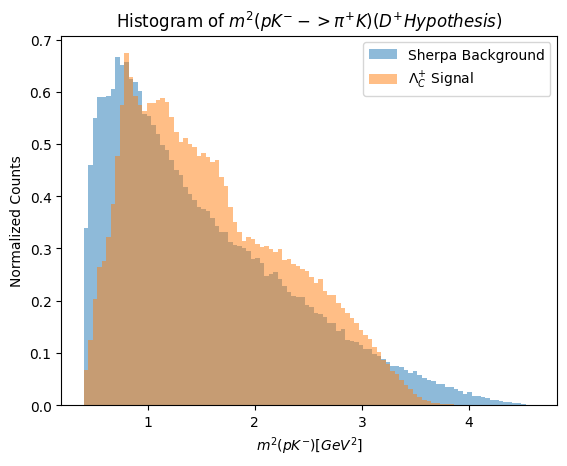

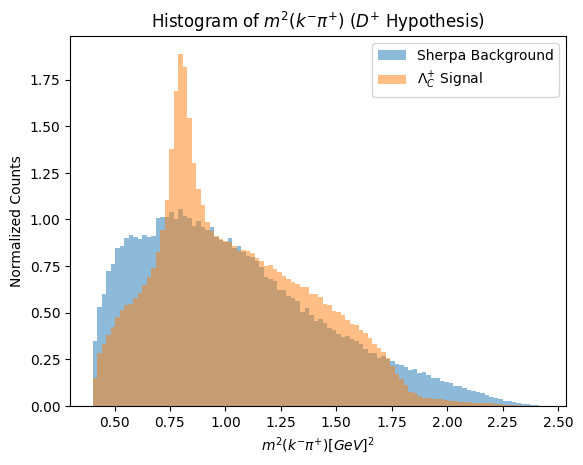

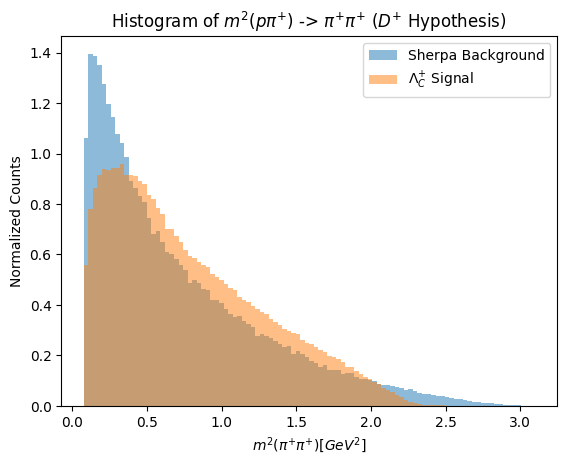

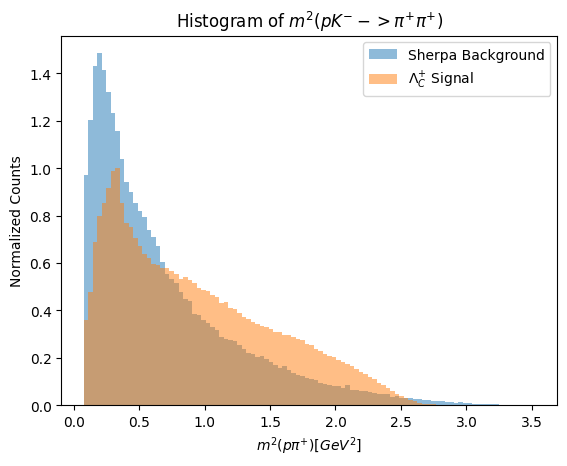

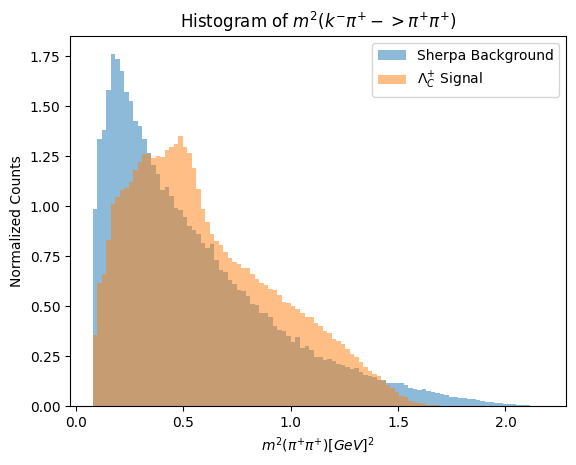

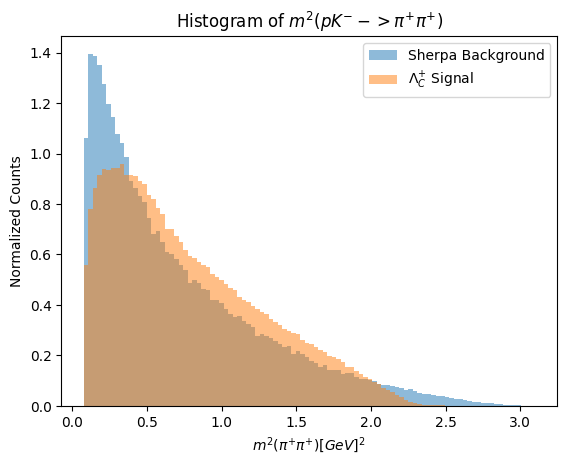

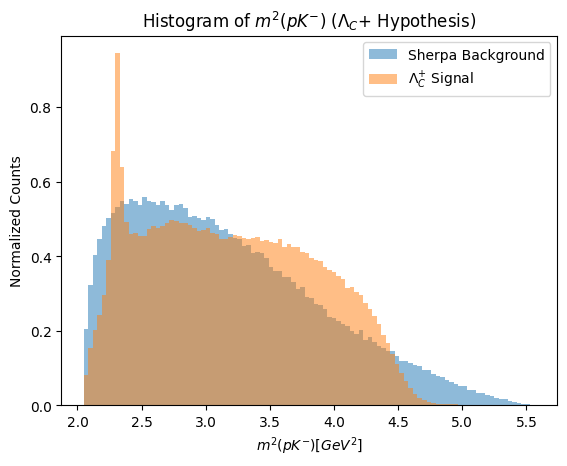

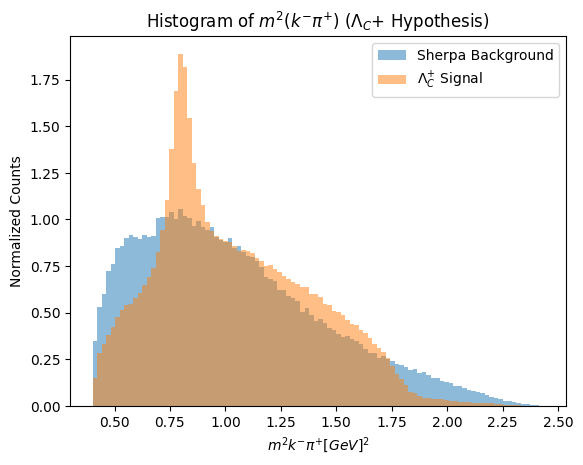

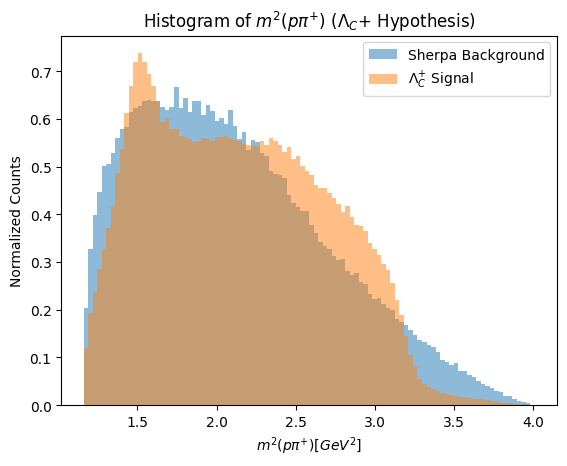

In [39]:
#(X_train1[column], X[train2], title, xlabel)

data_list = [(X_train1["inv_mass1"], X_train2["inv_mass1"], "Histogram of $m^2(pK^{-} -> \pi^{+}K) (D^{+} Hypothesis)$", "$m^2(pK^{-}) [GeV^{2}]$"),
             (X_train1["inv_mass2"], X_train2["inv_mass2"], "Histogram of $m^2(k^{-}\pi^{+})$ ($D^{+}$ Hypothesis)", "$m^2 (k^{-}\pi^{+}) [GeV]^2$"),
             (X_train1["inv_mass3"], X_train2["inv_mass3"], "Histogram of $m^2(p\pi^{+})$ -> $\pi^{+}\pi^{+}$ ($D^{+}$ Hypothesis)", "$m^2(\pi^{+}\pi^{+}) [GeV^{2}]$"),
             
             (X_train1["inv_mass4"], X_train2["inv_mass4"], "Histogram of $m^2(pK^{-} -> \pi^{+}\pi^{+})$", "$m^2(p\pi^{+}) [GeV^{2}]$"),
             (X_train1["inv_mass5"], X_train2["inv_mass5"], "Histogram of $m^2(k^{-}\pi^{+} -> \pi^{+}\pi^{+})$", "$m^2(\pi^{+}\pi^{+}) [GeV]^2$"),
             (X_train1["inv_mass6"], X_train2["inv_mass6"], "Histogram of $m^2(pK^{-} -> \pi^{+}\pi^{+})$", "$m^2(\pi^{+}\pi^{+}) [GeV]^2$"),
             
             (X_train1["inv_mass7"], X_train2["inv_mass7"], "Histogram of $m^2(pK^{-})$ ($\Lambda_C{+}$ Hypothesis)", "$m^2(pK^{-}) [GeV^{2}]$"),
             (X_train1["inv_mass8"], X_train2["inv_mass8"], "Histogram of $m^2(k^{-}\pi^{+})$ ($\Lambda_C{+}$ Hypothesis)", "$m^2 k^{-}\pi^{+} [GeV]^2$"),
             (X_train1["inv_mass9"], X_train2["inv_mass9"], "Histogram of $m^2(p\pi^{+})$ ($\Lambda_C{+}$ Hypothesis)", "$m^2(p\pi^{+}) [GeV^{2}]$"),
             
            ]

def plot_normalized_histograms(data_list, bins):
    for data1, data2, title, xlabel in data_list:
        hist_normalized(data1, data2, bins)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel("Normalized Counts")
        plt.legend()
        plt.show()

plot_normalized_histograms(data_list, 100)

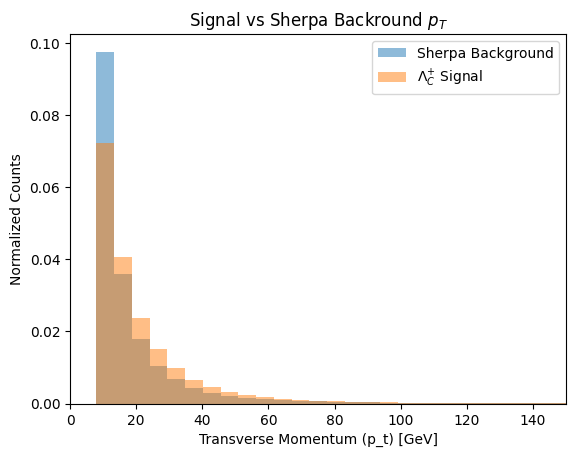

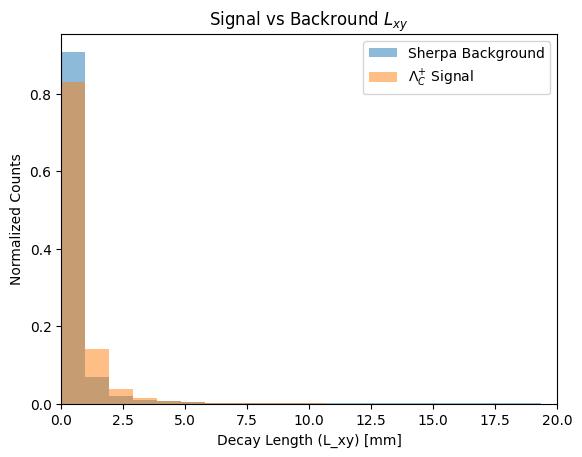

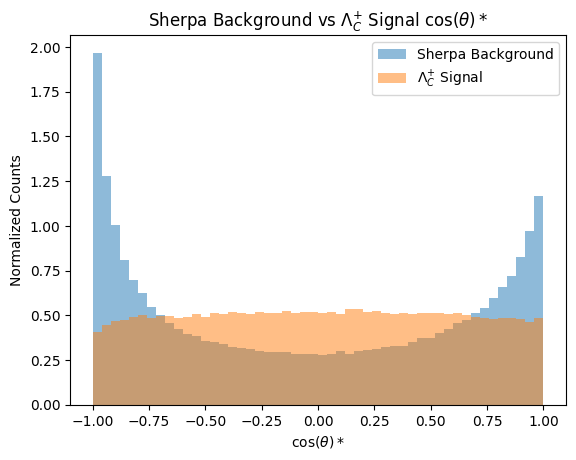

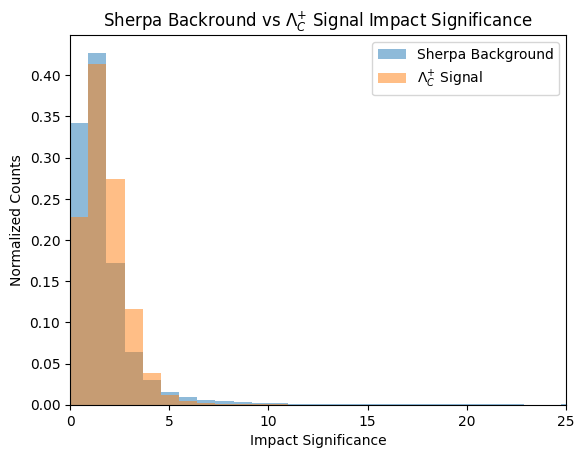

In [53]:
#Sherpa bulk variables
hist_normalized(X_train1["DMesons_pt"], X_train2["DMesons_pt"], 150)
plt.title("Signal vs Sherpa Backround $p_T$")
plt.xlabel("Transverse Momentum (p_t) [GeV]")
plt.ylabel("Normalized Counts")
plt.xlim(0, 150)
plt.legend()
plt.show()

hist_normalized(X_train1["DMesons_fitOutput__Lxy"], X_train2["DMesons_fitOutput__Lxy"], 1000)
plt.title("Signal vs Backround $L_{xy}$")
plt.xlabel("Decay Length (L_xy) [mm]")
plt.ylabel("Normalized Counts")
plt.xlim(0, 20)
plt.legend()
plt.show()

hist_normalized(X_train1["DMesons_costhetastar"], X_train2["DMesons_costhetastar"], 50)
plt.title("Sherpa Background vs $\\Lambda_C^{+}$ Signal $\\cos(\\theta)*$")
plt.xlabel("$\\cos(\\theta)*$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["DMesons_fitOutput__ImpactSignificance"], X_train2["DMesons_fitOutput__ImpactSignificance"], 300)
plt.title("Sherpa Backround vs $\Lambda_C^{+}$ Signal Impact Significance")
plt.xlabel("Impact Significance")
plt.ylabel("Normalized Counts")
plt.xlim(0, 25)
plt.legend()
plt.show()

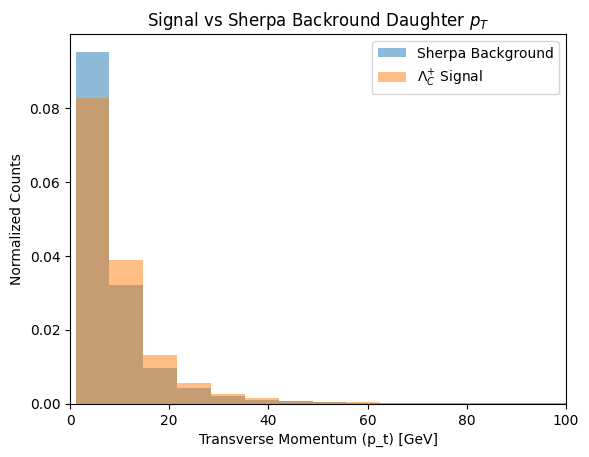

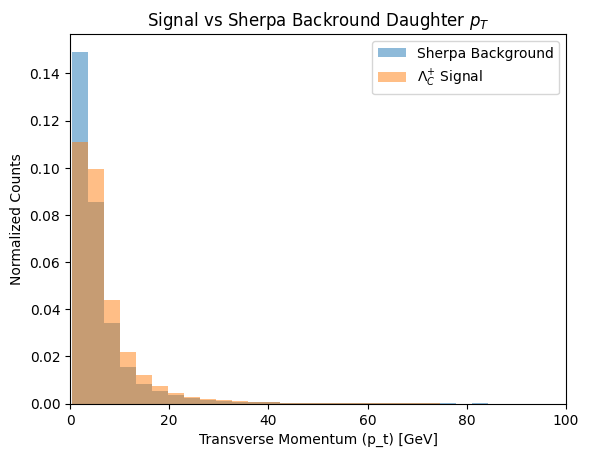

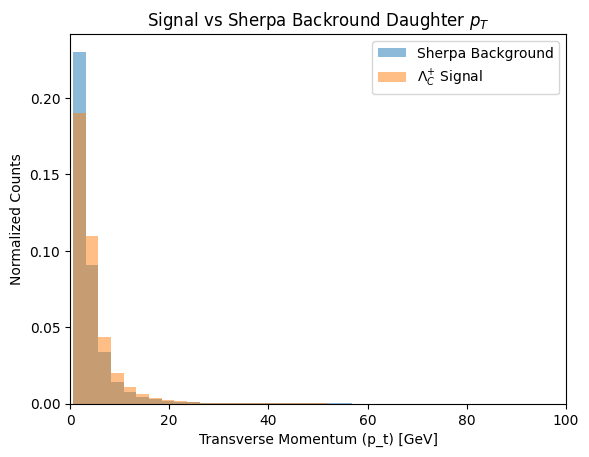

In [58]:
hist_normalized(X_train1["daughter_pt1"], X_train2["daughter_pt1"], 100)
plt.title("Signal vs Sherpa Backround Daughter $p_T$")
plt.xlabel("Transverse Momentum (p_t) [GeV]")
plt.ylabel("Normalized Counts")
plt.xlim(0, 100)
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_pt2"], X_train2["daughter_pt2"], 100)
plt.title("Signal vs Sherpa Backround Daughter $p_T$")
plt.xlabel("Transverse Momentum (p_t) [GeV]")
plt.ylabel("Normalized Counts")
plt.xlim(0, 100)
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_pt3"], X_train2["daughter_pt3"], 100)
plt.title("Signal vs Sherpa Backround Daughter $p_T$")
plt.xlabel("Transverse Momentum (p_t) [GeV]")
plt.ylabel("Normalized Counts")
plt.xlim(0, 100)
plt.legend()
plt.show()

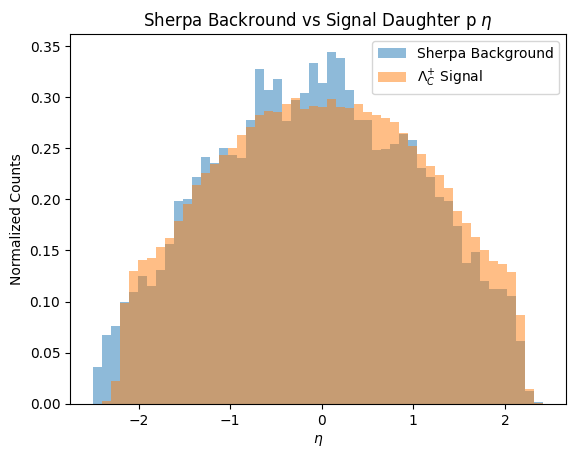

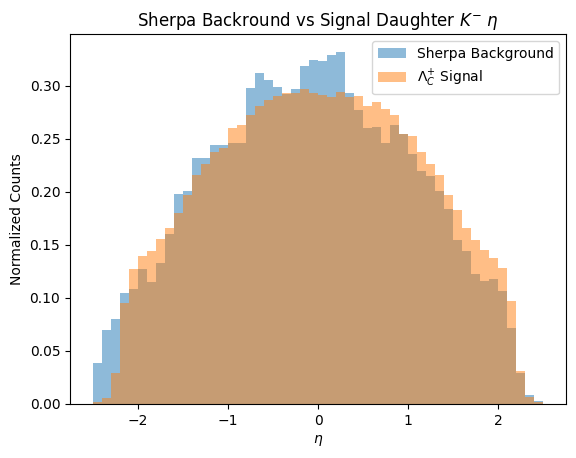

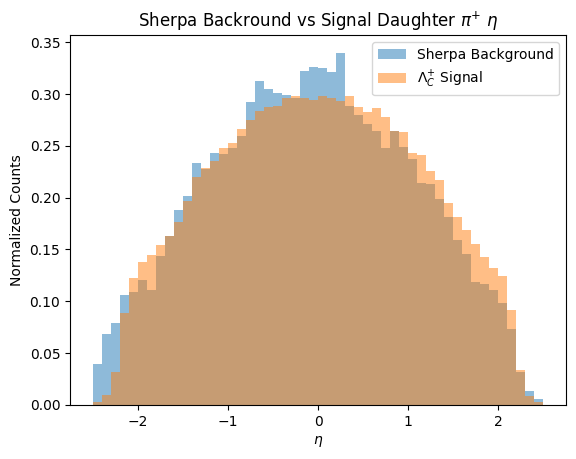

In [51]:
hist_normalized(X_train1["daughter_eta1"], X_train2["daughter_eta1"], 50)
plt.title("Sherpa Backround vs Signal Daughter p $\eta$")
plt.xlabel("$\eta$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_eta2"], X_train2["daughter_eta2"], 50)
plt.title("Sherpa Backround vs Signal Daughter $K^{-}$ $\eta$")
plt.xlabel("$\eta$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_eta3"], X_train2["daughter_eta3"], 50)
plt.title("Sherpa Backround vs Signal Daughter $\pi^{+}$ $\eta$")
plt.xlabel("$\eta$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

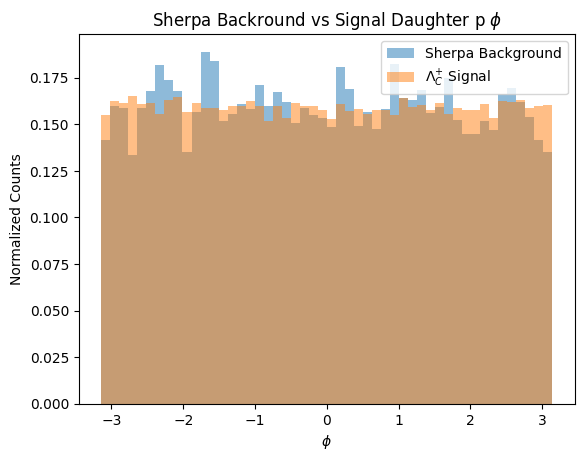

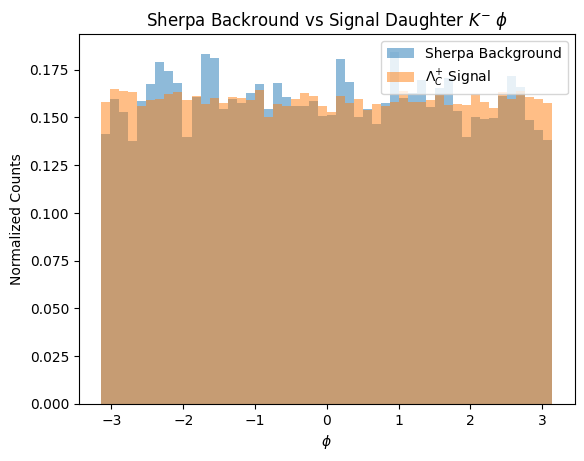

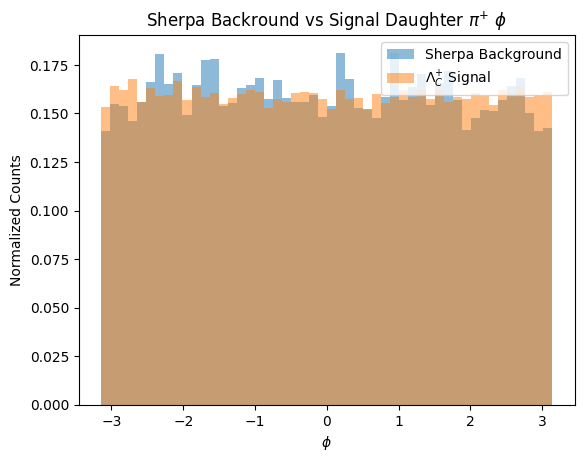

In [54]:
hist_normalized(X_train1["daughter_phi1"], X_train2["daughter_phi1"], 50)
plt.title("Sherpa Backround vs Signal Daughter p $\phi$")
plt.xlabel("$\phi$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_phi2"], X_train2["daughter_phi2"], 50)
plt.title("Sherpa Backround vs Signal Daughter $K^{-}$ $\phi$")
plt.xlabel("$\phi$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

hist_normalized(X_train1["daughter_phi3"], X_train2["daughter_phi3"], 50)
plt.title("Sherpa Backround vs Signal Daughter $\pi^{+}$ $\phi$")
plt.xlabel("$\phi$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

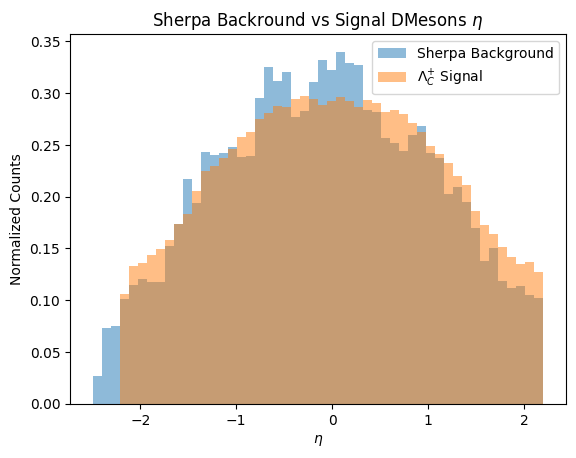

In [60]:
hist_normalized(X_train1["DMesons_eta"], X_train2["DMesons_eta"], 50)
plt.title("Sherpa Backround vs Signal DMesons $\eta$")
plt.xlabel("$\eta$")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()